## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [59]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [60]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [61]:
print(data[0:10] )

n00015388_


In [62]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [63]:
data[4]

'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg'

## 將 txt 轉成 pandas dataframe

In [64]:
import pandas as pd
arr_data = [x.split('\t') for x in data]
df = pd.DataFrame(arr_data)
df.head(5)

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [65]:
arr_data[0:5]

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']]

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

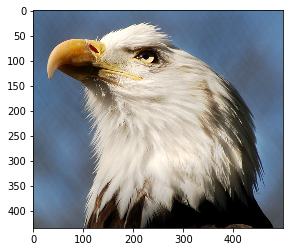

In [66]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [67]:
first_link

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [68]:
response

<Response [200]>

In [69]:
response.content[0:1500]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00\x9eExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00V\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00^\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x1c\x00\x00\x00f\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x82\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01Adobe Photoshop CS2 Windows\x002007:03:22 07:28:23\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x0

In [70]:
BytesIO(response.content)

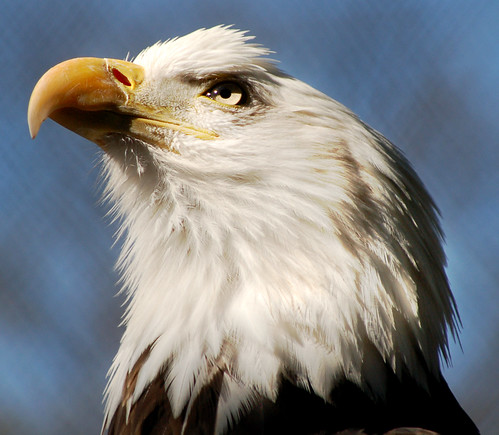

In [71]:
type(img)
img

In [72]:
img=np.array(img)
img

array([[[ 81, 110, 150],
        [ 78, 110, 148],
        [ 75, 111, 145],
        ...,
        [ 88, 132, 171],
        [ 88, 132, 171],
        [ 89, 131, 171]],

       [[ 81, 110, 150],
        [ 78, 110, 148],
        [ 76, 110, 145],
        ...,
        [ 86, 131, 170],
        [ 87, 131, 170],
        [ 88, 130, 170]],

       [[ 78, 110, 149],
        [ 77, 109, 147],
        [ 78, 108, 144],
        ...,
        [ 86, 131, 170],
        [ 87, 131, 170],
        [ 88, 130, 170]],

       ...,

       [[ 84,  88,  87],
        [ 83,  87,  86],
        [ 86,  88,  85],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]],

       [[ 83,  87,  86],
        [ 82,  86,  85],
        [ 85,  87,  84],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]],

       [[ 83,  87,  86],
        [ 84,  86,  85],
        [ 83,  85,  82],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]]

In [100]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    img_list=[]
    for i in range(0 , len(url_list)):
         response=requests.get(url_list[i])
         try :
                img=Image.open(BytesIO(response.content))
                img=np.array(img)
                img_list.append(img)
                print(url_list[i])
                print("ok")
         except:
                print("error(連結失敗):%s"%url_list[i])

    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
ok
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
ok
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
ok
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
ok
error(連結失敗):http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


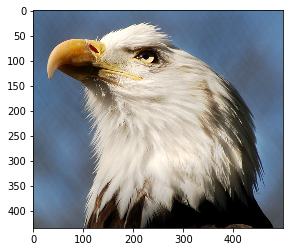

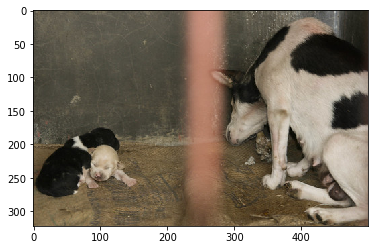

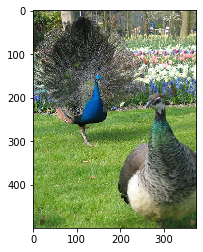

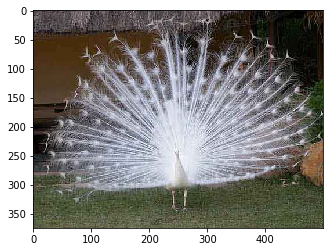

In [101]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()